### Data Wrangling and Exploration for Stroke Prediction Dataset from Kaggle:
### https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

### Import Packages:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Data:

In [3]:
Stroke = pd.read_csv('C:/Users/Mia/OneDrive/Documents/GitHub/Final_Project/Datasets/kaggle-stroke.csv')

In [4]:
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Recoding Categorical data to Numeric:
#### First look to see how many levels there are to do a proper recode:

In [5]:
np.unique(Stroke['Residence_type'])

array(['Rural', 'Urban'], dtype=object)

In [6]:
def Residence_type (series):
    if series == "Rural":
        return 0
    if series == "Urban":
        return 1
Stroke['Residence_typeR'] = Stroke['Residence_type'].apply(Residence_type)

In [7]:
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_typeR
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [8]:
(Stroke['gender']).value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#### I removed the "Other" value as there is only one row out of 5110 rows who did not select male or female 


In [28]:
Stroke[Stroke.gender == 'Other'].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_typeR,ever_marriedR,work_typeR
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,0,0,3


In [30]:
Stroke.drop(labels=[3116], axis=0, inplace=True)

#### This dropped index number 3116 and gave us just the Female and Male responses to be recoded:

In [31]:
Stroke.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [32]:
def Gender (series):
    if series == "Male":
        return 1
    if series == "Female":
        return 2
Stroke['genderR'] = Stroke['gender'].apply(Gender)
    

In [33]:
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_typeR,ever_marriedR,work_typeR,genderR
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,3,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,3,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1,3,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,4,2
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,3,1


<AxesSubplot:>

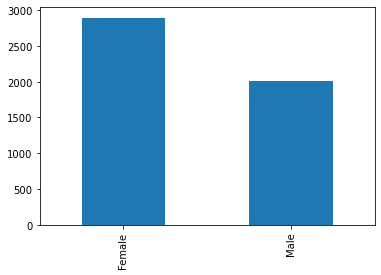

In [34]:
Stroke['gender'].value_counts().plot.bar()

### I did a quick plot that shows there are more females in this study than males

#### Continuing with Recoding Categorical Variables, ever_married:

In [9]:
np.unique(Stroke['ever_married'])

array(['No', 'Yes'], dtype=object)

In [10]:
def Ever_Married (series):
    if series == "Yes":
        return 1
    if series == "No":
        return 0

Stroke['ever_marriedR'] = Stroke['ever_married'].apply(Ever_Married)

In [11]:
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_typeR,ever_marriedR
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


#### Recoding work_type:

In [13]:
np.unique(Stroke['work_type'])

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [19]:
def Work_type (series):
    if series == "Govt_job":
        return 1
    if series == "Never_worked":
        return 2
    if series == "Private":
        return 3
    if series == "Self-employed":
        return 4
    if series == "children":
        return 5

Stroke['work_typeR'] = Stroke['work_type'].apply(Work_type)

In [20]:
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_typeR,ever_marriedR,work_typeR
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,3
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,4
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,3


#### Looking at NaN values in BMI:

In [16]:
np.unique(Stroke['bmi'])

array([10.3, 11.3, 11.5, 12. , 12.3, 12.8, 13. , 13.2, 13.3, 13.4, 13.5,
       13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8,
       14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9,
       16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. ,
       17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. , 18.1,
       18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1, 19.2,
       19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1, 20.2, 20.3,
       20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2, 21.3, 21.4,
       21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3, 22.4, 22.5,
       22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5, 23.6,
       23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7,
       24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8,
       25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27

#### Dropping the NaN values from the bmi column:

In [21]:
Stroke.dropna(inplace=True)

In [23]:
Stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_typeR,ever_marriedR,work_typeR
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0,0,5
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,1,4
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,1,4
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,1,3
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0,1,1,1


#### Recoding smoking_status column:

In [36]:
Stroke.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [37]:
def Smoking_status (series):
    if series == "never smoked":
        return 0
    if series == "Unknown":
        return 1
    if series == "formerly smoked":
        return 2
    if series == "smokes":
        return 3
    
Stroke['smoking_statusR'] = Stroke['smoking_status'].apply(Smoking_status)

In [38]:
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_typeR,ever_marriedR,work_typeR,genderR,smoking_statusR
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,3,1,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,3,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1,3,2,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,4,2,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,3,1,2


### Creating a new dataframe with the recoded data columns:

In [39]:
Stroke2 = Stroke[['id', 'genderR', 'age', 'hypertension', 'heart_disease', 'ever_marriedR', 'work_typeR', 'Residence_typeR', 'avg_glucose_level', 'bmi', 'smoking_statusR', 'stroke']]

In [40]:
Stroke2.head()

,id,genderR,age,hypertension,heart_disease,ever_marriedR,work_typeR,Residence_typeR,avg_glucose_level,bmi,smoking_statusR,stroke
0,9046,1,67.0,0,1,1,3,1,228.69,36.6,2,1
2,31112,1,80.0,0,1,1,3,0,105.92,32.5,0,1
3,60182,2,49.0,0,0,1,3,1,171.23,34.4,3,1
4,1665,2,79.0,1,0,1,4,0,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,3,1,186.21,29.0,2,1


### Correlation Matrix

In [41]:
Stroke2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,id,genderR,age,hypertension,heart_disease,ever_marriedR,work_typeR,Residence_typeR,avg_glucose_level,bmi,smoking_statusR,stroke
id,1.0,-0.0065,0.0091,0.0012,0.0041,0.017,-0.023,0.0052,0.0063,0.0032,0.011,0.0049
genderR,-0.0065,1.0,0.03,-0.022,-0.083,0.036,-0.059,0.0044,-0.053,0.026,-0.064,-0.0069
age,0.0091,0.03,1.0,0.27,0.26,0.68,-0.37,0.011,0.24,0.33,0.08,0.23
hypertension,0.0012,-0.022,0.27,1.0,0.12,0.16,-0.053,-0.0011,0.18,0.17,0.011,0.14
heart_disease,0.0041,-0.083,0.26,0.12,1.0,0.11,-0.03,-0.0024,0.15,0.041,0.067,0.14
ever_marriedR,0.017,0.036,0.68,0.16,0.11,1.0,-0.36,0.0047,0.15,0.34,0.086,0.11
work_typeR,-0.023,-0.059,-0.37,-0.053,-0.03,-0.36,1.0,-0.0055,-0.051,-0.3,-0.033,-0.034
Residence_typeR,0.0052,0.0044,0.011,-0.0011,-0.0024,0.0047,-0.0055,1.0,-0.0074,-0.00029,0.033,0.006
avg_glucose_level,0.0063,-0.053,0.24,0.18,0.15,0.15,-0.051,-0.0074,1.0,0.18,0.019,0.14
bmi,0.0032,0.026,0.33,0.17,0.041,0.34,-0.3,-0.00029,0.18,1.0,0.048,0.042


### Heat Map

<AxesSubplot:>

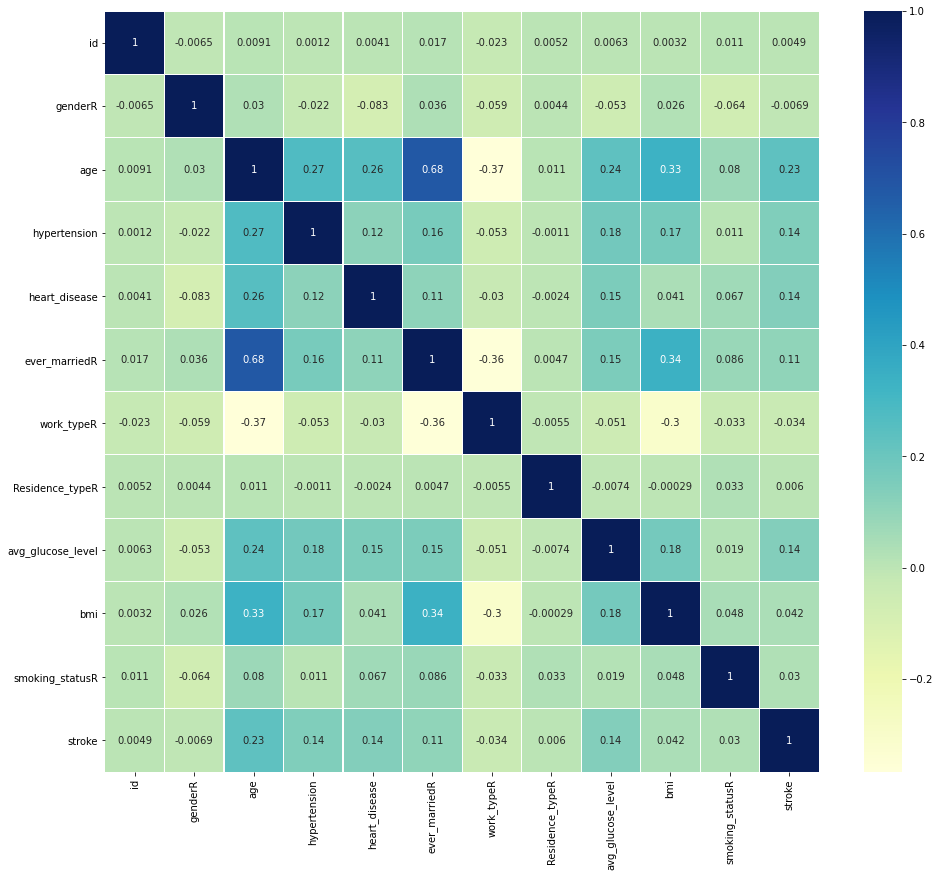

In [42]:
plt.figure(figsize=(16,14))
sns.heatmap(Stroke2.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

#### This doesn't look too exciting but we are going to do some other things with it, alot of the variables were recoded categorical variables 

### Looking at a Pairplot

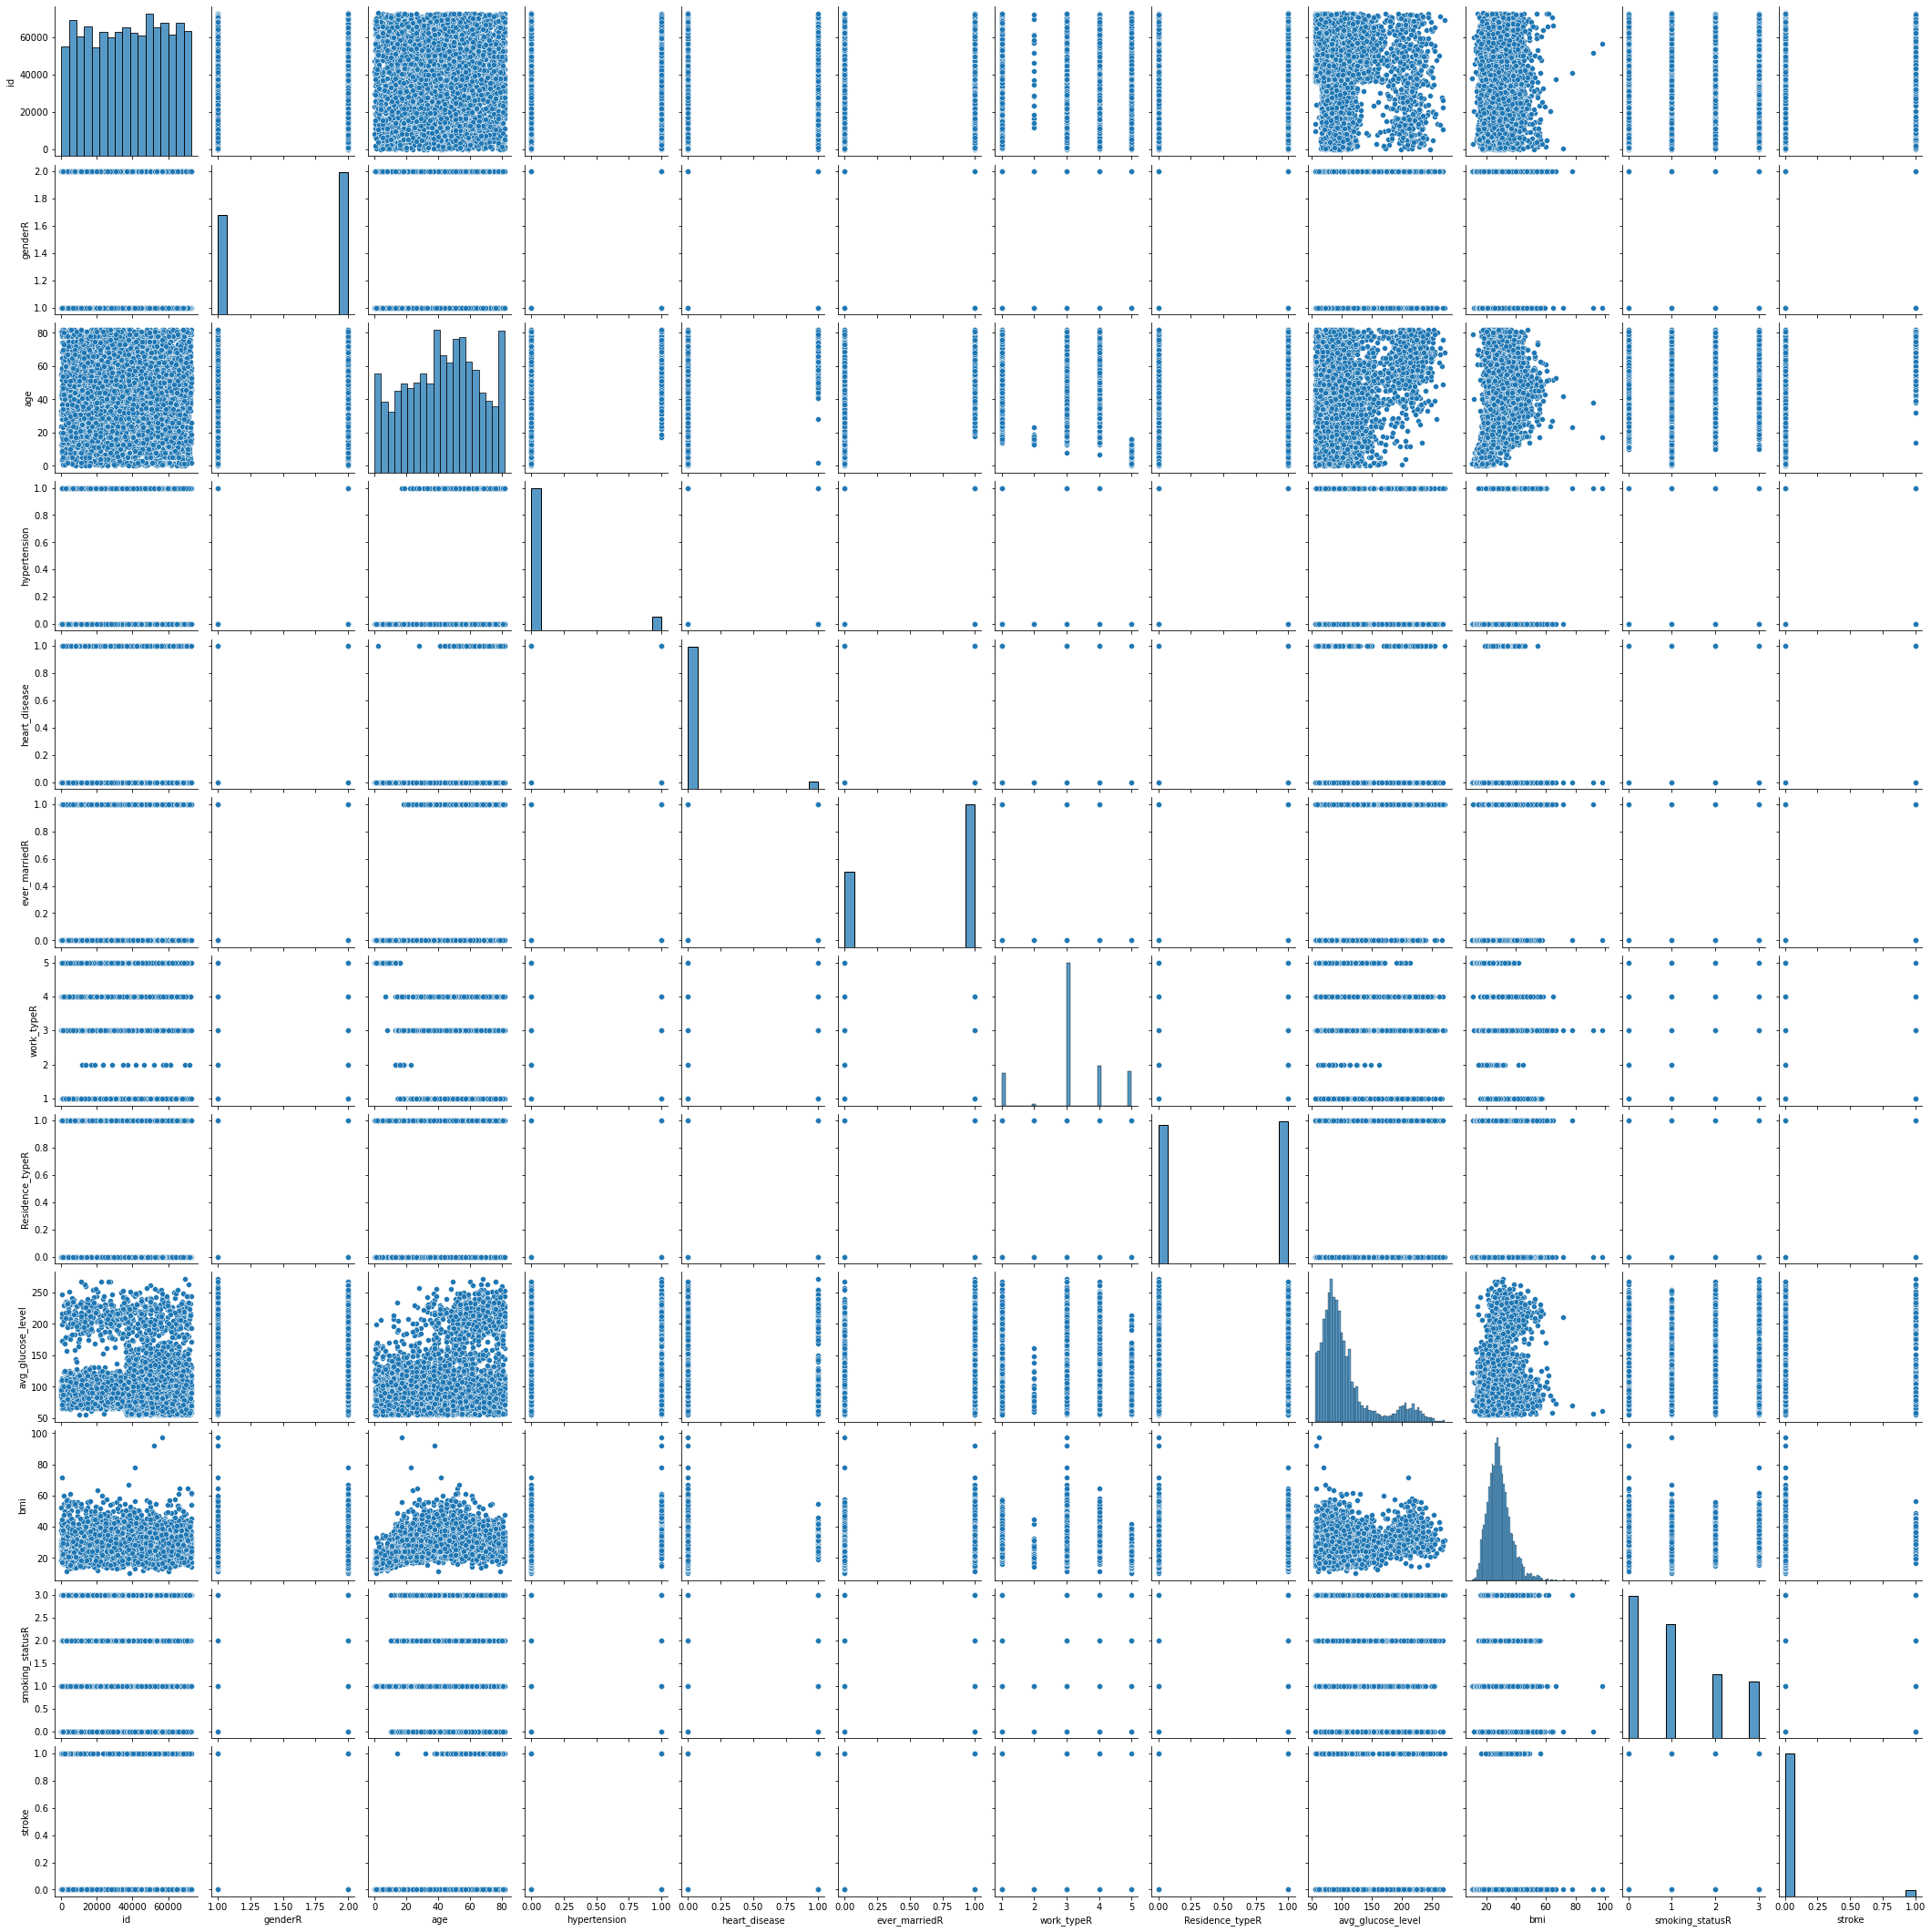

In [43]:
sns.pairplot(Stroke2)

### Histograms
#### Importing packages (I know this is not technically part of DW but I want to look at them)

In [44]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Histogram of Smoker Status

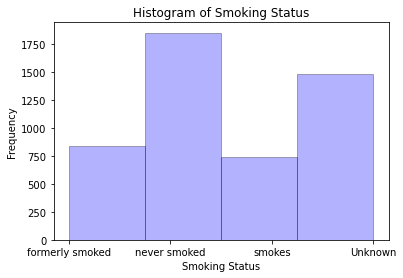

In [50]:
num_bins = 4
n, bins, patches = plt.hist(Stroke['smoking_status'], num_bins, facecolor='blue', alpha=.3, ec='black')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.title('Histogram of Smoking Status')
plt.show()

#### This shows the majority of the people in the study did not smoke, but there is also a large amount of people with an unknown smoking status


### Just Curious to Look at a Scatterplot of BMI and Glucose levels

Text(0, 0.5, 'Average Glucose Level')

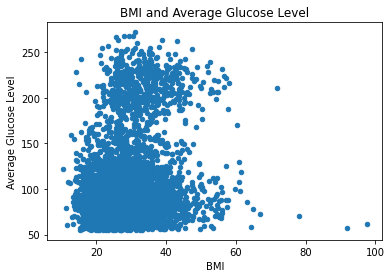

In [51]:
Plot = Stroke.plot.scatter(x='bmi', y='avg_glucose_level')
Plot.set_title("BMI and Average Glucose Level")
Plot.set_xlabel("BMI")
Plot.set_ylabel("Average Glucose Level")

#### Not really showing much of a correlation

In [53]:
Stroke2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   genderR            4908 non-null   int64  
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_marriedR      4908 non-null   int64  
 6   work_typeR         4908 non-null   int64  
 7   Residence_typeR    4908 non-null   int64  
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_statusR    4908 non-null   int64  
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.5 KB


In [66]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
Titanic222.age=Titanic222.age.astype(int)

In [56]:
Stroke2.age=Stroke2.age.astype(int)

C:\Users\Mia\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
Stroke2.avg_glucose_level=Stroke2.avg_glucose_level.astype(int)

In [57]:
Stroke2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   genderR            4908 non-null   int64  
 2   age                4908 non-null   int32  
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_marriedR      4908 non-null   int64  
 6   work_typeR         4908 non-null   int64  
 7   Residence_typeR    4908 non-null   int64  
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_statusR    4908 non-null   int64  
 11  stroke             4908 non-null   int64  
dtypes: float64(2), int32(1), int64(9)
memory usage: 479.3 KB


In [60]:
Stroke2.bmi=Stroke2.bmi.astype(int)

In [62]:
Stroke2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 4908 non-null   int64
 1   genderR            4908 non-null   int64
 2   age                4908 non-null   int32
 3   hypertension       4908 non-null   int64
 4   heart_disease      4908 non-null   int64
 5   ever_marriedR      4908 non-null   int64
 6   work_typeR         4908 non-null   int64
 7   Residence_typeR    4908 non-null   int64
 8   avg_glucose_level  4908 non-null   int32
 9   bmi                4908 non-null   int32
 10  smoking_statusR    4908 non-null   int64
 11  stroke             4908 non-null   int64
dtypes: int32(3), int64(9)
memory usage: 441.0 KB


#### Trying a Random Forest

#### Data Wrangling

In [63]:
x = Stroke2.drop('stroke', axis=1)
y = Stroke2['stroke']

#### Train Test Split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Initial Random Forest Model

In [67]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [68]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[1399    1]
 [  73    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1400
           1       0.00      0.00      0.00        73

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



#### Feature Importance

##### I feel like I did something wrong here, it has the id as highest predictor lol no bueno, feedback?

In [69]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

id                   0.227233
genderR              0.029719
age                  0.197218
hypertension         0.022902
heart_disease        0.026307
ever_marriedR        0.016757
work_typeR           0.045485
Residence_typeR      0.029348
avg_glucose_level    0.210425
bmi                  0.142768
smoking_statusR      0.051838
dtype: float64

<AxesSubplot:>

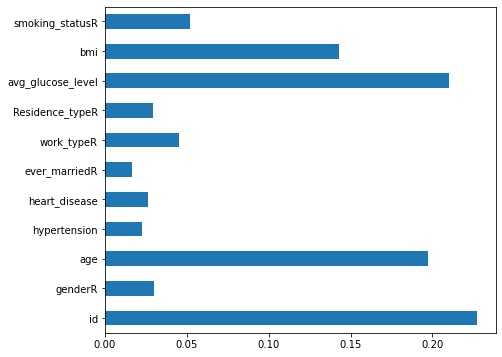

In [70]:
feature_importances.plot(kind='barh', figsize=(7,6))

### Silvia I want to remind myself to ask you about this, I am not sure if this is actually showing anything significant